## Importing libraries & loading the dataset

In [57]:
!pip install scikit-learn
!pip install missingno
!pip install dataframe_image

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import sklearn
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,precision_score, recall_score, auc,roc_curve
from sklearn.metrics import classification_report
from scipy import stats
import missingno as msno

import dataframe_image as dfi
%matplotlib inline

In [3]:
# Validation methods
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Metrics
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve

from sklearn.preprocessing import StandardScaler

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

## Utility Functions (Important)

In [4]:
def plot_confusion_matrix(y_test, y_pred, title):
    """
    Confusion matrix to evaluate the accuracy of KNN
    """
    #fig = plt.figure(figsize=(24, 16))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d',cmap='RdYlBu',cbar=True)
    plt.title(title)
    plt.xlabel('Predicted', fontsize=15)
    plt.ylabel('Actual', fontsize=15)
    plt.tight_layout()
    plt.show()

In [5]:
def plot_learning_curve(model, title, X, y, ylim=None, cv=5, n_jobs=4, 
                        train_sizes=np.linspace(0.1, 1.0, 10)):
    """
    Draw the training and GridSearchCV testing learning curves
    """
    plt.figure(figsize=(10, 7))
    plt.title(title, fontsize=20)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Number of training samples', fontsize=15)
    plt.ylabel('Score', fontsize=15)
    plt.tick_params(labelsize=14)
    
    # Get training and test scores along with train_sizes
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, 
                                                            cv=cv, n_jobs=n_jobs,
                                                            train_sizes=train_sizes)
    
    # Calculate mean and standard deviation of training and test data
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid(color='gray',linestyle='-')
    
    # Plot the learning curves
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color='r')
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1, color='g')
   
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
             label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
             label='Cross-validation score')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    return plt

In [6]:
def replace_missing(data):
    '''
    Filling missing values with median
    '''
    data = data.fillna(value=data.median(), inplace=True) # After replacing NaN with median

In [7]:
def replace_S_chol(data):
    '''
    Filling 0 values with mean for Serum cholesterol & ST depression
    '''
    data[['Serum cholesterol','ST depression']]=data[['Serum cholesterol','ST depression']].replace(0, data[['Serum cholesterol','ST depression']].mean())

In [8]:
def trial():
    for column in data.columns:
        try:
            data[column]=data[column].astype(int)
        except:
            data[column]=data[column].astype(float)
        data = data.applymap(lambda x: np.NaN if x==-9 else x)

In [9]:
def duplicate(data):
    '''
    Checking 4 duplicates
    '''
    duplicated = data.duplicated().sum()
    if duplicated:
        print('Duplicate Rows in Dataset are : {}'.format(duplicated))
    else:
        print('Dataset contains no duplicate Values')

### Loading Dataset

In [10]:
pd.pandas.set_option('display.max_columns',None)
df = pd.read_csv('data/heart-disease.csv')
data = df.copy()
data.describe()

,Age,Gender,Chest pain type,Resting blood pressure,Serum cholesterol,Fasting blood sugar,Resting electrocardiographic,Maximum heart rate,Exercise induced angina,ST depression,ST segment,Number of major vessels,Thal,class
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [61]:
df_styled = data.describe.style.background_gradient() #adding a gradient based on values in cell

AttributeError: 'function' object has no attribute 'style'

In [62]:
dfi.export(df_styled,"describe.png")

ValueError: Your Styled DataFrame has more than 100 rows and will produce a huge image file, possibly causing your computer to crash. Override this error by explicitly setting `max_rows` to -1 for all columns. Styled DataFrames are unable to select a subset of rows or columns and therefore do not work with the `max_rows` and `max_cols` parameters

In [11]:
data['class'].value_counts()

0    411
1    265
2    109
3    107
4     28
Name: class, dtype: int64

## Data Cleaning

### Missing Values
Check for missing values and replace them

Text(0, 0.5, 'Proportion Filled')

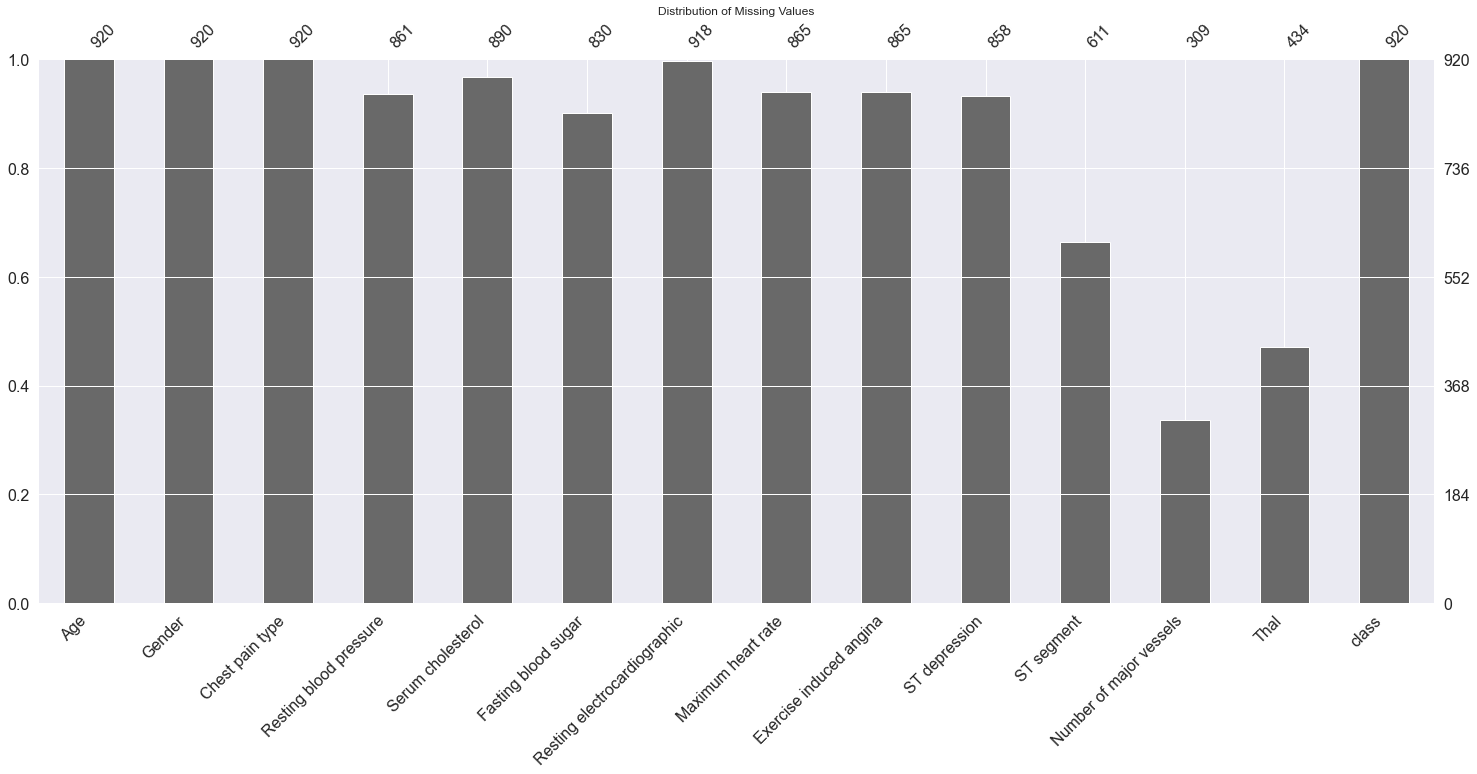

In [12]:
# Bar Chart
msno.bar(data)
plt.title('Distribution of Missing Values')
plt.ylabel('Proportion Filled')


<AxesSubplot:>

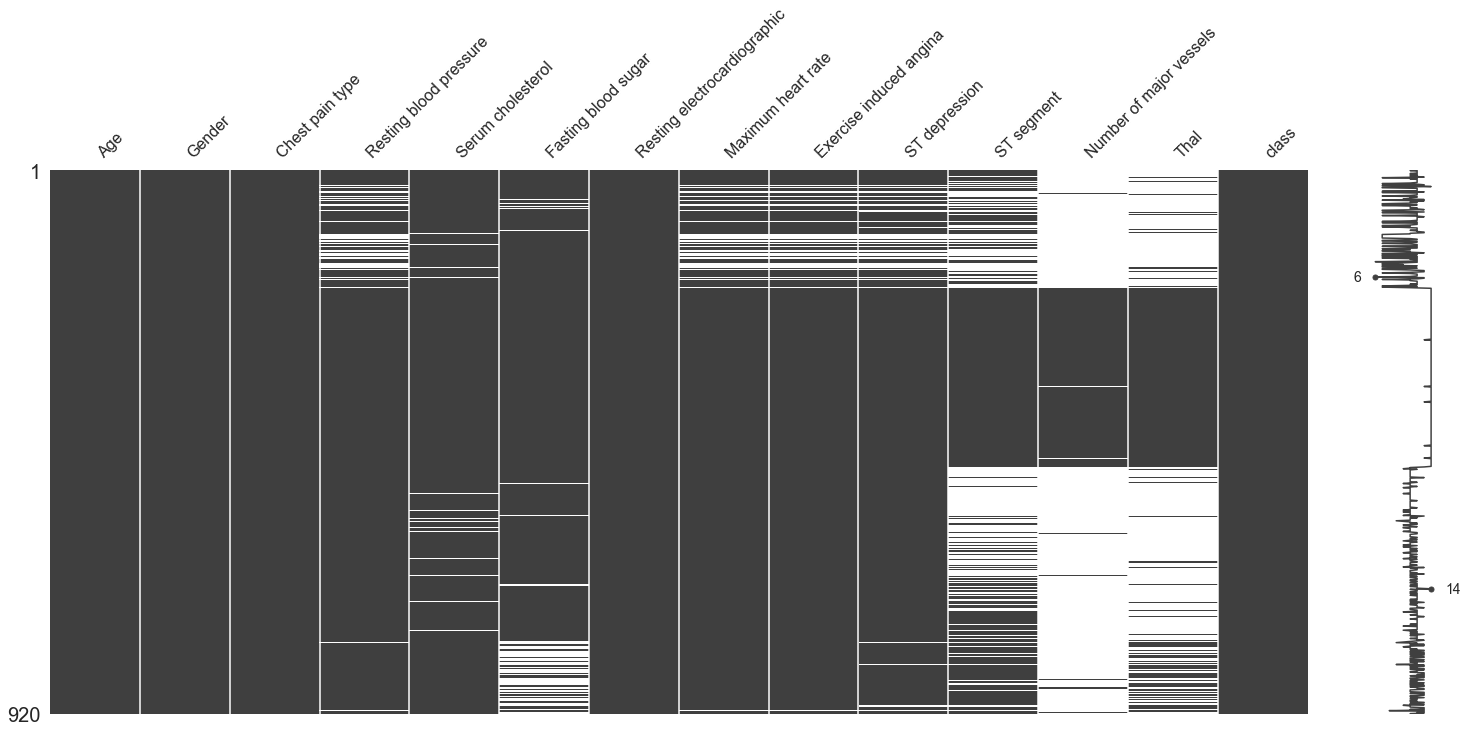

In [13]:
# Matrix Chart
msno.matrix(data)

<AxesSubplot:>

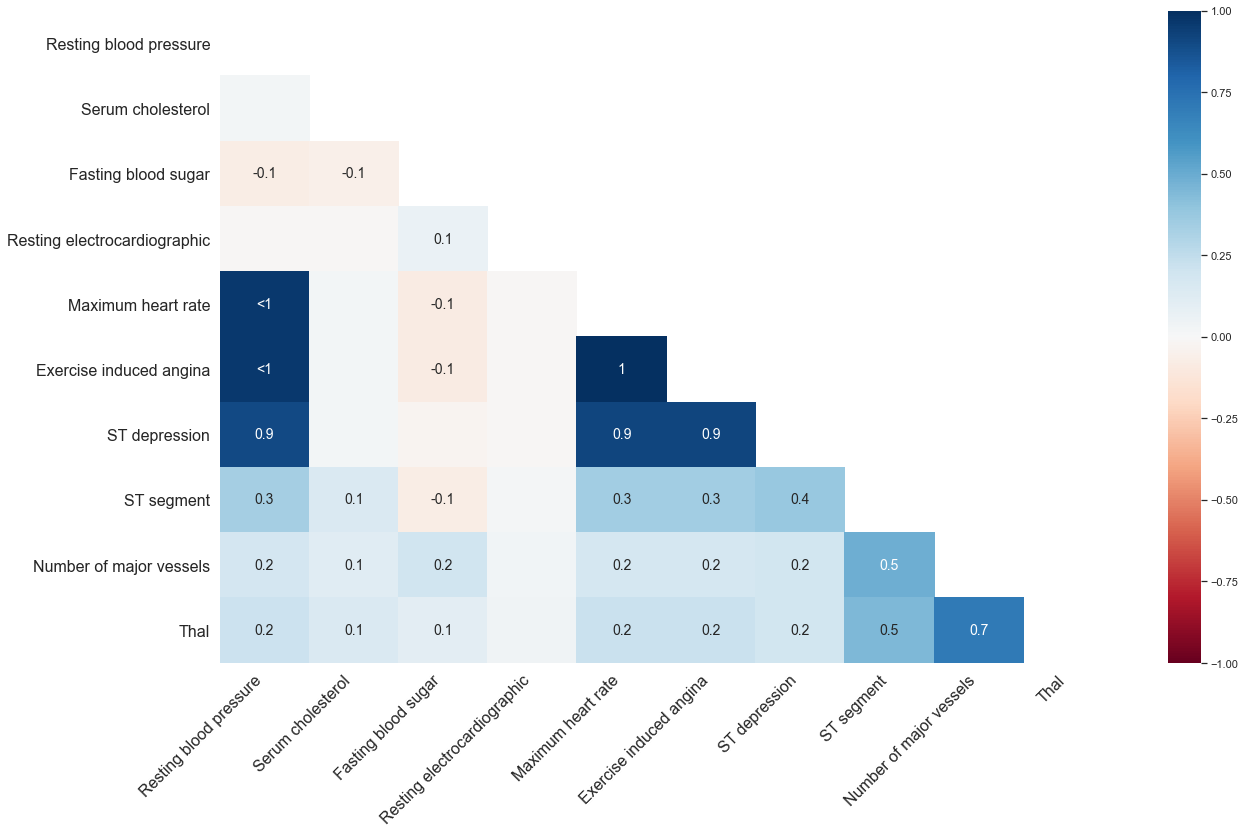

In [14]:
# Heatmap
msno.heatmap(data)

In [15]:
data.isnull().sum()

Age                               0
Gender                            0
Chest pain type                   0
Resting blood pressure           59
Serum cholesterol                30
Fasting blood sugar              90
Resting electrocardiographic      2
Maximum heart rate               55
Exercise induced angina          55
ST depression                    62
ST segment                      309
Number of major vessels         611
Thal                            486
class                             0
dtype: int64

In [16]:
data.head()

,Age,Gender,Chest pain type,Resting blood pressure,Serum cholesterol,Fasting blood sugar,Resting electrocardiographic,Maximum heart rate,Exercise induced angina,ST depression,ST segment,Number of major vessels,Thal,class
0,63.0,1.0,4.0,140.0,260.0,0.0,1.0,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44.0,1.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60.0,1.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55.0,1.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,2.0,NaN,NaN,0


In [17]:
# Filling missing values with median
replace_missing(data)

# Filling 0 values with median/mean
replace_S_chol(data)

In [18]:
data.head()

,Age,Gender,Chest pain type,Resting blood pressure,Serum cholesterol,Fasting blood sugar,Resting electrocardiographic,Maximum heart rate,Exercise induced angina,ST depression,ST segment,Number of major vessels,Thal,class
0,63.0,1.0,4.0,140.0,260.0,0.0,1.0,112.0,1.0,3.000000,2.0,0.0,6.0,2
1,44.0,1.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,0.853261,2.0,0.0,6.0,0
2,60.0,1.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,1.500000,3.0,0.0,6.0,2
3,55.0,1.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,2.500000,1.0,0.0,6.0,1
4,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.300000,2.0,0.0,6.0,0


In [19]:
data.isnull().sum()

Age                             0
Gender                          0
Chest pain type                 0
Resting blood pressure          0
Serum cholesterol               0
Fasting blood sugar             0
Resting electrocardiographic    0
Maximum heart rate              0
Exercise induced angina         0
ST depression                   0
ST segment                      0
Number of major vessels         0
Thal                            0
class                           0
dtype: int64

In [20]:
data.head(20)

,Age,Gender,Chest pain type,Resting blood pressure,Serum cholesterol,Fasting blood sugar,Resting electrocardiographic,Maximum heart rate,Exercise induced angina,ST depression,ST segment,Number of major vessels,Thal,class
0,63.0,1.0,4.0,140.0,260.000000,0.0,1.0,112.0,1.0,3.000000,2.0,0.0,6.0,2
1,44.0,1.0,4.0,130.0,209.000000,0.0,1.0,127.0,0.0,0.853261,2.0,0.0,6.0,0
2,60.0,1.0,4.0,132.0,218.000000,0.0,1.0,140.0,1.0,1.500000,3.0,0.0,6.0,2
3,55.0,1.0,4.0,142.0,228.000000,0.0,1.0,149.0,1.0,2.500000,1.0,0.0,6.0,1
4,66.0,1.0,3.0,110.0,213.000000,1.0,2.0,99.0,1.0,1.300000,2.0,0.0,6.0,0
5,66.0,1.0,3.0,120.0,199.908696,0.0,1.0,120.0,0.0,-0.500000,1.0,0.0,6.0,0
6,65.0,1.0,4.0,150.0,236.000000,1.0,1.0,105.0,1.0,0.853261,2.0,0.0,6.0,3
7,60.0,1.0,3.0,180.0,199.908696,0.0,1.0,140.0,1.0,1.500000,2.0,0.0,6.0,0
8,60.0,1.0,3.0,120.0,199.908696,0.0,0.0,141.0,1.0,2.000000,1.0,0.0,6.0,3
9,60.0,1.0,2.0,160.0,267.000000,1.0,1.0,157.0,0.0,0.500000,2.0,0.0,6.0,1


### Duplicates
Check for duplicate rows

In [21]:
duplicate(data)

Duplicate Rows in Dataset are : 2


In [22]:
duplicated = data[data.duplicated(keep=False)]
duplicated.head()

,Age,Gender,Chest pain type,Resting blood pressure,Serum cholesterol,Fasting blood sugar,Resting electrocardiographic,Maximum heart rate,Exercise induced angina,ST depression,ST segment,Number of major vessels,Thal,class
139,58.0,1.0,3.0,150.0,219.0,0.0,1.0,118.0,1.0,0.853261,2.0,0.0,6.0,2
187,58.0,1.0,3.0,150.0,219.0,0.0,1.0,118.0,1.0,0.853261,2.0,0.0,6.0,2
604,49.0,0.0,2.0,110.0,223.0,0.0,0.0,160.0,0.0,0.853261,2.0,0.0,6.0,0
605,49.0,0.0,2.0,110.0,223.0,0.0,0.0,160.0,0.0,0.853261,2.0,0.0,6.0,0


In [23]:
# drop duplicate rows
data.drop_duplicates(inplace=True)

In [24]:
duplicate(data)

Dataset contains no duplicate Values


In [25]:
duplicated.head()

,Age,Gender,Chest pain type,Resting blood pressure,Serum cholesterol,Fasting blood sugar,Resting electrocardiographic,Maximum heart rate,Exercise induced angina,ST depression,ST segment,Number of major vessels,Thal,class
139,58.0,1.0,3.0,150.0,219.0,0.0,1.0,118.0,1.0,0.853261,2.0,0.0,6.0,2
187,58.0,1.0,3.0,150.0,219.0,0.0,1.0,118.0,1.0,0.853261,2.0,0.0,6.0,2
604,49.0,0.0,2.0,110.0,223.0,0.0,0.0,160.0,0.0,0.853261,2.0,0.0,6.0,0
605,49.0,0.0,2.0,110.0,223.0,0.0,0.0,160.0,0.0,0.853261,2.0,0.0,6.0,0


### Outliers

In [26]:
from scipy.stats import zscore
data.apply(stats.zscore)

,Age,Gender,Chest pain type,Resting blood pressure,Serum cholesterol,Fasting blood sugar,Resting electrocardiographic,Maximum heart rate,Exercise induced angina,ST depression,ST segment,Number of major vessels,Thal,class
0,1.006537,0.515952,0.804242,0.433898,0.413108,-0.420622,0.492241,-1.021869,1.316109,2.141118,0.295417,-0.361845,0.309338,0.879193
1,-1.008848,0.515952,0.804242,-0.108475,-0.515773,-0.420622,0.492241,-0.425205,-0.759815,-0.408438,0.295417,-0.361845,0.309338,-0.871565
2,0.688318,0.515952,0.804242,0.000000,-0.351853,-0.420622,0.492241,0.091905,1.316109,0.359656,2.232505,-0.361845,0.309338,0.879193
3,0.157954,0.515952,0.804242,0.542373,-0.169719,-0.420622,0.492241,0.449903,1.316109,1.547298,-1.641672,-0.361845,0.309338,0.003814
4,1.324756,0.515952,-0.270422,-1.193221,-0.442920,2.377430,1.733661,-1.538979,1.316109,0.122128,0.295417,-0.361845,0.309338,-0.871565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,1.749048,0.515952,0.804242,-0.922034,-0.681356,-0.420622,0.492241,-1.817422,1.316109,-0.408438,0.295417,-0.361845,1.026440,0.003814
916,1.749048,0.515952,0.804242,0.433898,-0.681356,2.377430,-0.749180,0.768124,1.316109,0.953477,0.295417,-0.361845,1.026440,1.754572
917,1.961193,0.515952,-0.270422,1.518645,-0.681356,-0.420622,1.733661,-0.942314,-0.759815,0.478420,0.295417,2.816848,0.309338,-0.871565
918,2.067266,-1.938163,-0.270422,1.518645,-0.681356,-0.420622,0.492241,-0.663871,-0.759815,-0.408438,-1.641672,-0.361845,-1.841967,0.003814


### Train Test Split

In [27]:
X = data.drop(['class'], axis='columns')
y = data['class']

In [28]:
# Splitting dataset for hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [29]:
# Pre processing with standard scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
print ('Training Set:', X_train.shape, y_train.shape)
print ('Testing Set:', X_test.shape, y_test.shape)

Training Set: (734, 13) (734,)
Testing Set: (184, 13) (184,)


### KNN

In [31]:
# Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Training model
knn = knn.fit(X_train, y_train)

# Testing model
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.5706521739130435

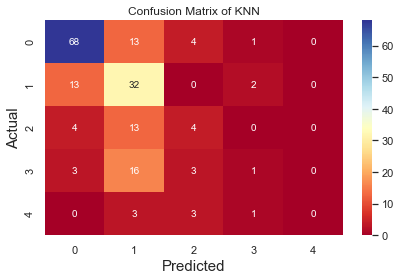

In [32]:
# KNN Matrix
title = 'Confusion Matrix of KNN'
plot_confusion_matrix(y_test, y_pred, title=title)  


In [33]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        86
           1       0.42      0.68      0.52        47
           2       0.29      0.19      0.23        21
           3       0.20      0.04      0.07        23
           4       0.00      0.00      0.00         7

    accuracy                           0.57       184
   macro avg       0.33      0.34      0.32       184
weighted avg       0.52      0.57      0.53       184



C:\Users\UniWork\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UniWork\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UniWork\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Accuracy Rate')

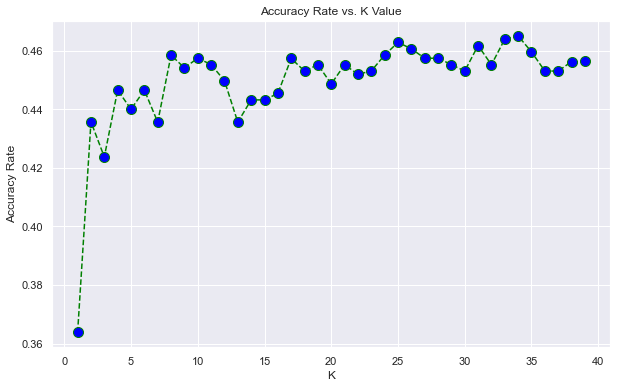

In [34]:
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn, X,data['class'],cv=10)
    accuracy_rate.append(score.mean())

plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

Text(0, 0.5, 'Error Rate')

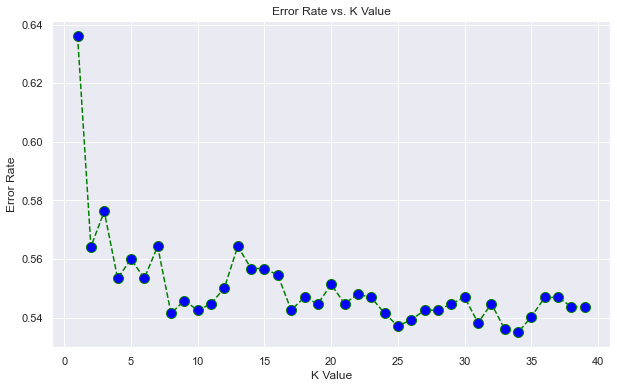

In [35]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,data['class'],cv=10)
    error_rate.append(1-score.mean())

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate, color='green', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

### Random Forest (Without hyper parameters)

In [36]:
# Classifier
rf = RandomForestClassifier()

# Training model
rf = rf.fit(X_train, y_train)

# Testing model
y_pred = rf.predict(X_test)
rf.score(X_test, y_test)

0.592391304347826

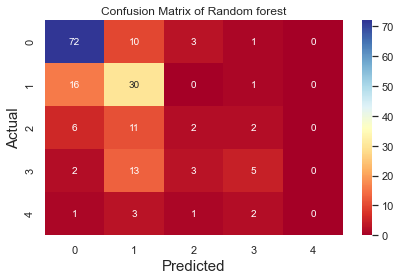

In [37]:
# RF matrix
title = 'Confusion Matrix of Random forest'
plot_confusion_matrix(y_test, y_pred, title=title)  

In [38]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79        86
           1       0.45      0.64      0.53        47
           2       0.22      0.10      0.13        21
           3       0.45      0.22      0.29        23
           4       0.00      0.00      0.00         7

    accuracy                           0.59       184
   macro avg       0.37      0.36      0.35       184
weighted avg       0.54      0.59      0.55       184



C:\Users\UniWork\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UniWork\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UniWork\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest (With hyper parameters)

In [53]:
#Setting values for the parameters
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 10, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

#Creating a dictionary for the hyper parameters
hyper_rf = dict(n_estimators = n_estimators, max_depth = max_depth, 
              min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

#Applying GridSearchCV to get the best value for hyperparameters
gridrf = GridSearchCV(rf, hyper_rf, cv = 3, verbose = 1, n_jobs = -1)
bestrf = gridrf.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [54]:
#Printing the best hyper-parameters
print('The best hyper parameters are:\n', gridrf.best_params_)

The best hyper parameters are:
 {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [55]:
#Fitting the random forest model with the best hyper parameters obtained through GridSearchCV
rf_best = RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100)
rf_best.fit(X_train, y_train)
pred_rf_best = rf_best.predict(X_test)

In [56]:
#Checking different metrics for random forest model after tuning the hyperparameters
print('Checking different metrics for random forest model after tuning the hyperparameters:\n')
print("Training accuracy: ",rf_best.score(X_train,y_train))
acc_score = accuracy_score(y_test, pred_rf_best)
print('Testing accuracy: ',acc_score)

Checking different metrics for random forest model after tuning the hyperparameters:

Training accuracy:  0.6416893732970027
Testing accuracy:  0.5706521739130435


### Decision Tree

In [43]:
# Classifier
dt = DecisionTreeClassifier()

# Training model
dt = dt.fit(X_train, y_train)

# Testing model
y_pred = dt.predict(X_test)
dt.score(X_test, y_test)

0.46195652173913043

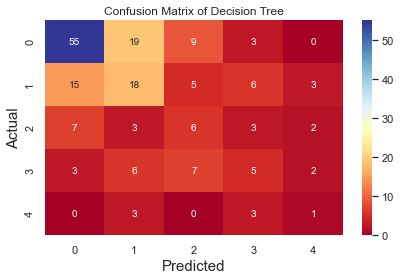

In [44]:
# DT Matrix
title = 'Confusion Matrix of Decision Tree'
plot_confusion_matrix(y_test, y_pred, title=title)  

In [45]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66        86
           1       0.37      0.38      0.37        47
           2       0.22      0.29      0.25        21
           3       0.25      0.22      0.23        23
           4       0.12      0.14      0.13         7

    accuracy                           0.46       184
   macro avg       0.33      0.33      0.33       184
weighted avg       0.48      0.46      0.47       184



### SVM

In [46]:
# Classifier
svm = SVC()

# Training model
svm = svm.fit(X_train, y_train)

# Testing model
y_pred = svm.predict(X_test)
svm.score(X_test, y_test)

0.592391304347826

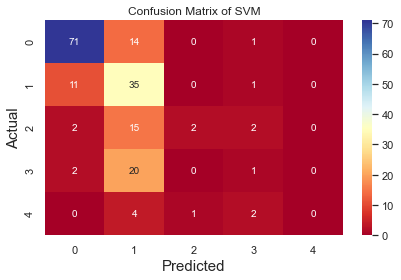

In [47]:
# DT Matrix
title = 'Confusion Matrix of SVM'
plot_confusion_matrix(y_test, y_pred, title=title) 

In [48]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        86
           1       0.40      0.74      0.52        47
           2       0.67      0.10      0.17        21
           3       0.14      0.04      0.07        23
           4       0.00      0.00      0.00         7

    accuracy                           0.59       184
   macro avg       0.41      0.34      0.32       184
weighted avg       0.58      0.59      0.55       184



C:\Users\UniWork\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UniWork\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UniWork\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gradient Boosting

In [49]:
# Classifier 
GB = GradientBoostingClassifier()

# Training model
GB = GB.fit(X_train, y_train)

# Testing model
y_pred = GB.predict(X_test)

GB.score(X_test, y_test)

0.5869565217391305

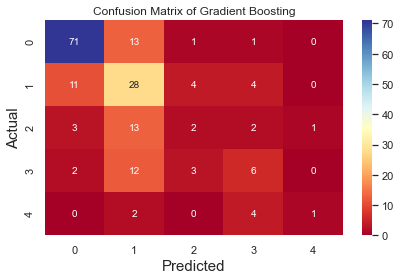

In [50]:
# GRadeint boosting Matrix
title = 'Confusion Matrix of Gradient Boosting'
plot_confusion_matrix(y_test, y_pred, title=title)

In [51]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82        86
           1       0.41      0.60      0.49        47
           2       0.20      0.10      0.13        21
           3       0.35      0.26      0.30        23
           4       0.50      0.14      0.22         7

    accuracy                           0.59       184
   macro avg       0.46      0.38      0.39       184
weighted avg       0.57      0.59      0.57       184



### Comparing ML algorithms performance 

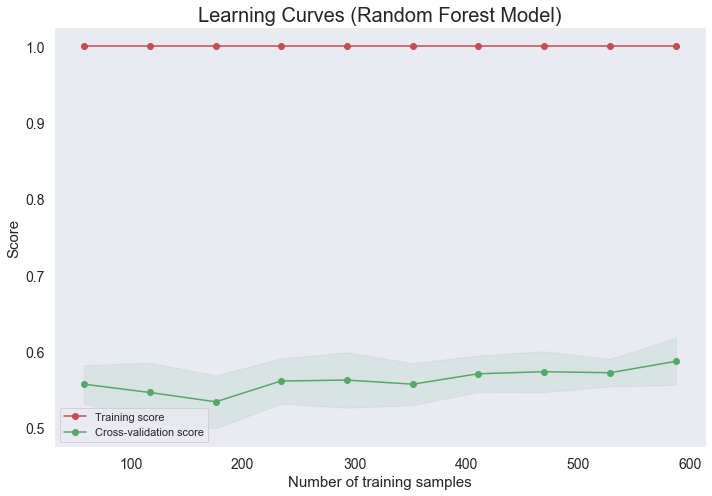

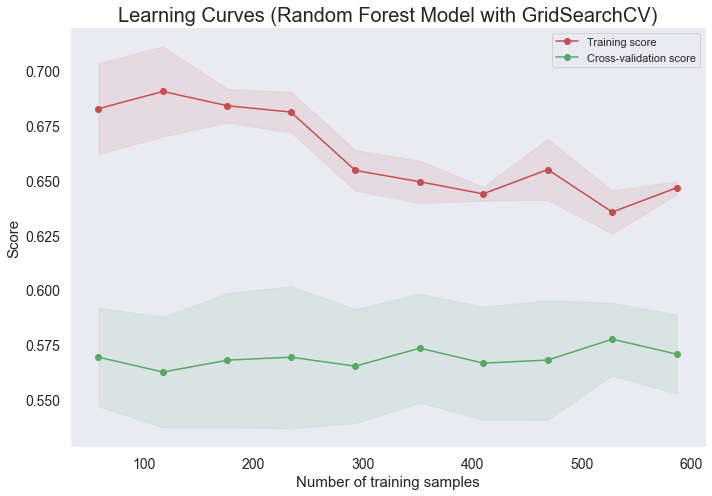

In [52]:
# Learning curve for Random Forest models
title = 'Learning Curves (Random Forest Model)'
plot_learning_curve(rf, title, X_train, y_train, ylim=None, 
                    cv=5, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 10));

title = 'Learning Curves (Random Forest Model with GridSearchCV)'
plot_learning_curve(rf_best, title, X_train, y_train, ylim=None, 
                    cv=5, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 10));